# What is the Impact of Precipitation on NYC MTA Subway Ridership?

The associated github repository, including all *iPython* Notebooks created to clean and organize the data, can be found [here](https://github.com/rezaisrad/nyc_mta).

### Steps:
1. Find average turnstile use per subway station over time (Notebook [here](https://github.com/rezaisrad/nyc_mta/blob/master/Turnstile%20Data.ipynb))
2. Find matching precipitation data (Notebook [here](https://github.com/rezaisrad/nyc_mta/blob/master/Weather%20Data.ipynb))
3. Find station longitude and latitude (Notebook [here](https://github.com/rezaisrad/nyc_mta/blob/master/Station%20Location.ipynb))
4. Merge Data into one table
(Notebook [here](https://github.com/rezaisrad/nyc_mta/blob/master/Merging%20Tables.ipynb))
5. Look for any relationship between ridership and precipitation (Notebook [here](https://github.com/rezaisrad/nyc_mta/blob/master/Data%20Analysis%20-%20Linear%20Regression.ipynb)) 
6. Draw conclusions (Notebook [here](https://github.com/rezaisrad/nyc_mta/blob/master/Conclusions.ipynb)) 

**Null Hypothesis:** Precipitation has a statistically signficant impact on MTA subway ridership.

**Alternate Hypothesis:** Precipitation does not have a statistically signficant impact on MTA subway ridership.

Average Entries & Exits:
```
With Precipitation:
      ENTRIES  EXITS
mean  188.7    141.6
std   215.7    174.3

Without Precipitation:
      ENTRIES   EXITS
mean  180.8     136.7
std   223.0     179.5
```

## Testing the Hypothesis

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [138]:
df = pd.read_csv('./clean_data/precip_ridership_by_day_hour.csv')

In [139]:
df.columns

Index([u'DAYOFYEAR', u'HOUROFDAY', u'ENTRIES', u'EXITS', u'HOURLYPrecip'], dtype='object')

In [75]:
df.loc[df['HOURLYPrecip'] == 0, 'PRECIP_LEVEL'] = 0
df.loc[(df['HOURLYPrecip'] > 0) & (df['HOURLYPrecip'] <= 0.15), 'PRECIP_LEVEL'] = 1
df.loc[df['HOURLYPrecip'] > 0.15, 'PRECIP_LEVEL'] = 2

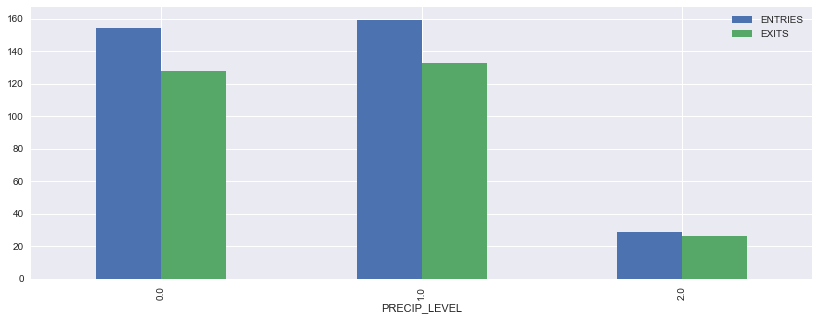

In [76]:
df[['PRECIP_LEVEL','ENTRIES','EXITS']].groupby('PRECIP_LEVEL').mean().plot(kind='bar', figsize=(14,5))

In [85]:
df.loc[df['HOURLYPrecip'] <= 0.1, 'PRECIP_B'] = False
df.loc[df['HOURLYPrecip'] > 0.1, 'PRECIP_B'] = True

#### The graph below shows a decrease in ridership where precipitation occurs at > 0.1 inches an hour:

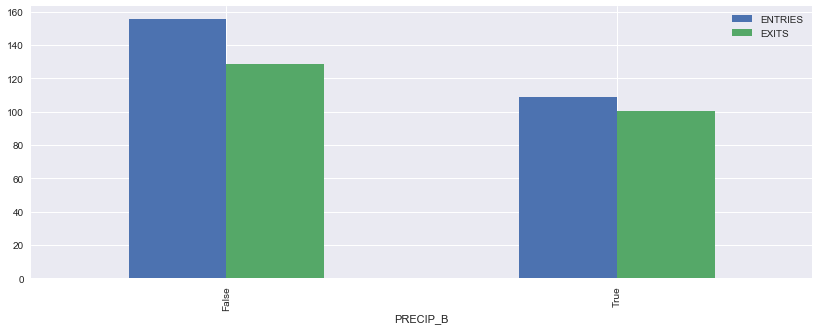

In [86]:
df[['PRECIP_B','ENTRIES','EXITS']].groupby('PRECIP_B').mean().plot(kind='bar', figsize=(14,5))

In [87]:
df_bool = df[['ENTRIES','EXITS','PRECIP_B']]

As expected, there is higher variance in ridership when there is no precipitation. When there is precipitation, you have lower variance in ridership.

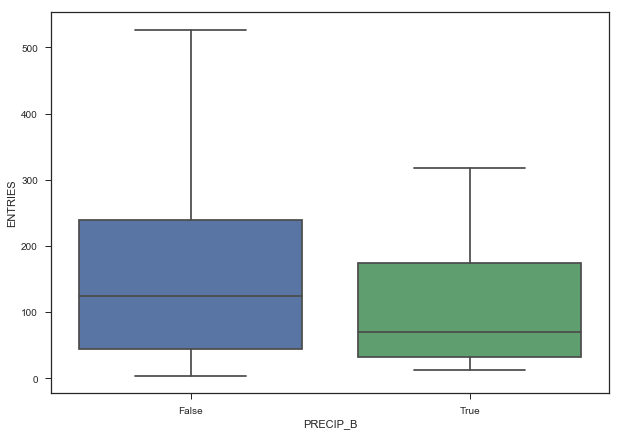

In [133]:
sns.set_style('ticks')
plt.figure(figsize=(10,7))
sns.boxplot(data=df_bool,
           x='PRECIP_B',
           y='ENTRIES')

In [116]:
df['DATETIME'] = df['DAYOFYEAR'] + df['HOUROFDAY'].apply(lambda x: (x/24.0))

In [134]:
df_final = df[['DATETIME', 'ENTRIES', 'EXITS', 'HOURLYPrecip']]
df_final = df_final.set_index('DATETIME')

#### When it does rain, how much is enough to deter ridership?

In [154]:
precip = df_final.loc[df_final['HOURLYPrecip'] > 0]

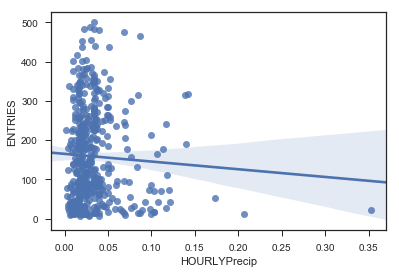

In [155]:
sns.regplot(x='HOURLYPrecip',
            y='ENTRIES',
            data=precip)

In [159]:
precip_2 = df_final.loc[df_final['HOURLYPrecip'] > 0.05]

In [163]:
len(precip_2)

59

In [165]:
59.0/len(df)

0.02388663967611336

With only 59 observations (2.4% of the data) showing precipitation amounts of greater than `0.05`, more data needs to be explored to find a statisitically significant relationship between precipitation and ridership.